 Auth: Mawaba P. DAO

 01/27/2021

 Florida Institute of Technology
 
 Digital Image Processing: ECE5256 (Dr. Kozaitis)


Proj 1 write up:
    
    In this project we first read an image in grayscale and display it. Then the pixel intensity levels of the image are scaled to be between 0-255.
    Noise is then generated and added to the image. As we generate greater numbers of noisy images and average them the noise gets cancelled. Therefore, as the number of
    averaged noisy images increases, the quality of the averaged image improves.
    Finally, an affine transformation is used to rotate and scale the image. The cv2 library was used in this step.
   

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

# Reading grayscale img

In [2]:
img = Image.open("./imgs/2001_mono.png")
grayscale_image = img.convert("L")
grayscale_array = np.asarray(grayscale_image)

# Displaying grayscale img
Note: In python matplotlib does not display images in 32 or 64 levels. In the intensity scaling section we show the original min an max intensity values as well as the values after rescaling.

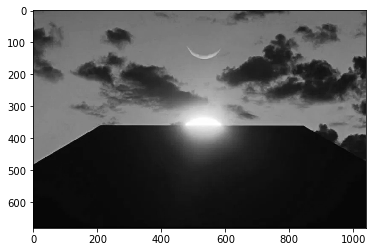

In [3]:
plt.imshow(grayscale_array, cmap="gray")

# Intensity scaling

Maximum pixel value before scaling: 252
Minimum pixel value before scaling: 7
Scaling...
Maximum pixel value after scaling: 255
Minimum pixel value after scaling: 0
New Img: 


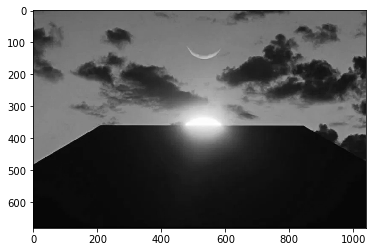

In [4]:
print(f"Maximum pixel value before scaling: {np.max(grayscale_array)}")
print(f"Minimum pixel value before scaling: {np.min(grayscale_array)}")
print("Scaling...")
grayscale_array  = ((grayscale_array - grayscale_array.min()) * (1/(grayscale_array.max() - grayscale_array.min()) * 255)).astype('uint8')
print(f"Maximum pixel value after scaling: {np.max(grayscale_array)}")
print(f"Minimum pixel value after scaling: {np.min(grayscale_array)}")
print("New Img: ")
plt.imshow(grayscale_array, cmap="gray")



# Noisy image generation
Example noisy image

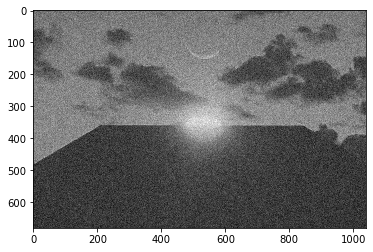

In [7]:
N = 1 #This is the number of averaged noisy images. Change this var to see how it affects how noisy the image gets.
noisy_imgs = genNoisyImg(N, grayscale_array)
avg_noisy_img = np.average(noisy_imgs, axis=2)
plt.imshow(avg_noisy_img, cmap="gray")

# Noisy image MSE

[         nan 480.60394723 440.12330983 426.43765011]


Text(0, 0.5, 'MSE')

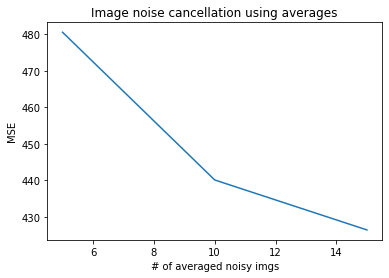

In [10]:
N = [0,5,10,15]
MSE = np.zeros((len(N)))
for x in range(len(N)):
    noisy_imgs = genNoisyImg(N[x], grayscale_array) #See last cell for function definition
    avg_noisy_img = np.average(noisy_imgs, axis=2)
    MSE[x] = (np.square(grayscale_array - avg_noisy_img)).mean()
print(MSE)
plt.plot(N,MSE)
plt.title("Image noise cancellation using averages")
plt.xlabel("# of averaged noisy imgs")
plt.ylabel("MSE")


This plot shows that more noisy samples provide better noise cancellation when we average them.

# Rotation & Scaling

Transformation matrix:
[[  0.57340643   0.40150351  85.31746403]
 [ -0.40150351   0.57340643 353.82363629]]


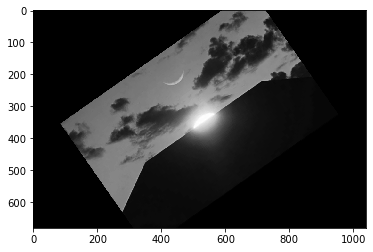

In [13]:
rows, cols = grayscale_array.shape
scale = 0.7
theta = 35 #in deg
M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,scale)
print("Transformation matrix:")
print(M)
dst = cv2.warpAffine(grayscale_array,M,(cols,rows))
plt.imshow(dst, cmap="gray")

In [6]:
def genNoisyImg(N, img):
    rows = img.shape[0]
    cols = img.shape[1]
    noisy_imgs = np.zeros((rows, cols, N))
    # print(noisy_imgs[0,:,:])
    for x in range(N):
        sigma = 20
        mu = 20
        noise = sigma * np.random.randn(rows, cols) + mu
        noisy_imgs[:,:,x] = img+noise
        # print(noise)
    return noisy_imgs